In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

spotify_sample = pd.read_feather('./spotify_2000_2020.feather')
spotify_sample.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [14]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Print the resample
(spotify_1_resample.head())

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
25872,0.4250,['The Script'],0.609,241467.0,4.024450,0.629,0.0,4Musyaro0NM5Awx8b5c627,0.00000,10.0,0.0978,-5.024,1.0,The Man Who Can't Be Moved,60.0,2008-09-08,0.0264,99.955,0.325,2008.0
6767,0.0129,['Neil Young'],0.423,501213.0,8.353550,0.834,0.0,4CqbJHZ6JtVM3MLh41y7JI,0.00113,9.0,0.1640,-5.498,0.0,Like a Hurricane - 2003 Remaster,49.0,2004-11-15,0.0370,113.876,0.606,2004.0
24794,0.1020,['Ruel'],0.688,189608.0,3.160133,0.500,0.0,2pyjbGTpJCPjMYwCbdymiF,0.00000,2.0,0.3550,-7.411,1.0,Dazed & Confused,76.0,2018-04-27,0.1380,127.906,0.418,2018.0
12879,0.1140,['Amy Winehouse'],0.539,317000.0,5.283333,0.809,0.0,4o2d25zcVbx5BEaHcKbtOI,0.00001,10.0,0.0715,-8.851,0.0,In My Bed,37.0,2003,0.0683,95.631,0.724,2003.0
28675,0.6070,['Phora'],0.544,210452.0,3.507533,0.446,1.0,39stgJx17gXBtxvPGlVJfl,0.00000,6.0,0.0923,-11.735,1.0,I Think I Love You,63.0,2016-10-11,0.5360,115.192,0.469,2016.0


In [15]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Calculate the mean of the danceability column of spotify_1_resample

mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5917380041290571


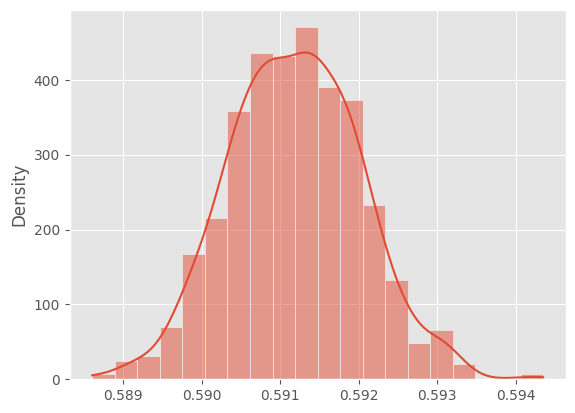

In [16]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)

# Draw a histogram of the resample means
sns.histplot(mean_danceability_1000, stat='density', bins=20, kde=True)
plt.show()

In [17]:
mean_popularity_2000_samp = []
spotify_population = pd.read_feather('./spotify_2000_2020.feather')
# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    sample_rows = spotify_population.sample(n=500, replace=False)
    mean_popularity_2000_samp.append(sample_rows['popularity'].mean())

# Print the sampling distribution results
print(mean_popularity_2000_samp)

[55.242, 55.572, 54.764, 54.316, 54.508, 55.438, 55.382, 54.3, 54.39, 54.2, 54.582, 54.668, 54.916, 55.084, 55.03, 54.566, 54.958, 54.942, 55.418, 55.468, 55.17, 54.698, 55.698, 55.16, 55.158, 54.774, 54.936, 54.472, 55.168, 55.172, 54.836, 54.094, 54.598, 54.832, 54.77, 54.888, 55.196, 54.718, 54.086, 55.082, 54.366, 55.048, 54.954, 54.684, 55.052, 55.366, 55.274, 54.262, 53.678, 54.686, 55.526, 54.5, 54.834, 54.294, 54.706, 56.164, 53.852, 55.052, 54.528, 54.534, 54.972, 54.552, 53.976, 55.296, 54.242, 54.712, 54.904, 54.556, 54.932, 54.998, 54.908, 55.46, 54.112, 55.066, 55.248, 54.996, 54.546, 55.192, 55.02, 54.402, 55.198, 54.874, 55.714, 54.814, 55.072, 54.99, 54.324, 54.236, 54.568, 54.894, 54.69, 54.486, 54.182, 54.798, 55.01, 54.422, 54.222, 55.334, 55.016, 54.524, 54.72, 53.964, 55.012, 55.032, 53.976, 54.534, 55.314, 54.276, 54.77, 54.516, 54.98, 54.362, 55.7, 55.658, 54.904, 54.526, 53.888, 55.402, 55.408, 54.754, 54.954, 53.854, 54.906, 54.746, 54.052, 54.734, 54.796, 55.0

In [18]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity
    	spotify_sample.sample(n=500, replace=True)['popularity'].mean()
    )

# Print the bootstrap distribution results

print(mean_popularity_2000_boot)

[54.536, 55.162, 54.642, 55.516, 54.04, 55.0, 55.118, 54.622, 55.368, 54.916, 54.886, 55.59, 55.062, 54.18, 54.66, 54.558, 55.458, 54.848, 55.092, 54.312, 55.102, 55.458, 53.838, 55.146, 55.45, 54.97, 54.944, 54.856, 55.036, 53.546, 55.742, 55.024, 54.502, 54.846, 55.09, 55.644, 54.708, 54.936, 54.876, 55.084, 53.96, 54.572, 55.108, 54.822, 55.216, 54.88, 54.398, 54.448, 55.398, 55.486, 55.062, 54.594, 55.086, 55.316, 54.646, 55.226, 55.304, 55.13, 55.434, 55.578, 55.156, 54.814, 54.384, 54.968, 55.25, 54.39, 54.51, 55.246, 55.796, 53.608, 55.378, 54.88, 54.938, 54.87, 54.334, 54.61, 54.166, 55.472, 54.648, 54.346, 54.956, 54.728, 55.394, 55.14, 55.082, 55.85, 54.948, 55.97, 55.83, 55.584, 54.622, 55.418, 54.544, 54.204, 54.76, 54.746, 55.074, 54.958, 54.734, 54.978, 54.908, 54.646, 53.978, 54.758, 54.58, 55.008, 54.544, 54.258, 54.566, 56.034, 54.86, 54.226, 55.044, 55.148, 54.402, 54.492, 55.018, 54.048, 55.724, 55.306, 54.594, 55.146, 54.726, 55.032, 55.248, 54.126, 54.42, 54.71, 54

In [19]:
# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

sampling_distribution = np.random.normal(samp_mean, np.std(mean_popularity_2000_samp), 5000)
bootstrap_distribution = np.random.normal(pop_mean, np.std(mean_popularity_2000_boot), 5000)
# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.837142308430955, 54.830719061406796, 54.83545753147751]


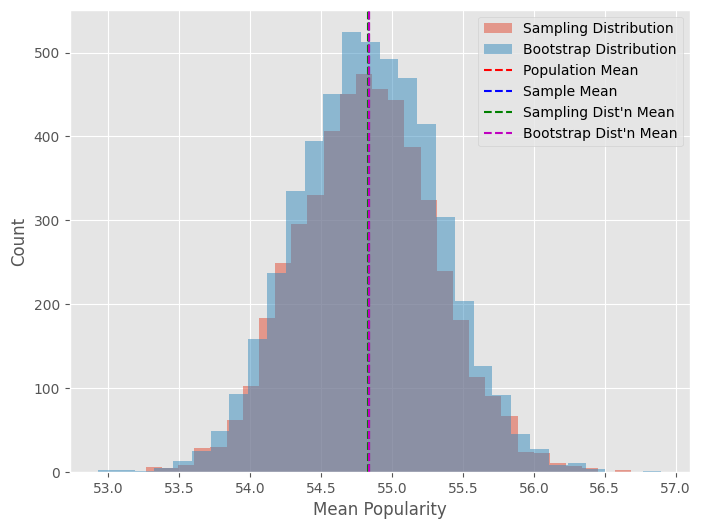

In [20]:
# Generate a plot showing the sampling and bootstrap distributions
plt.figure(figsize=(8, 6))
plt.hist(sampling_distribution, bins=30, alpha=0.5, label="Sampling Distribution")
plt.hist(bootstrap_distribution, bins=30, alpha=0.5, label="Bootstrap Distribution")
plt.axvline(pop_mean, color='r', linestyle='--', label="Population Mean")
plt.axvline(samp_mean, color='b', linestyle='--', label="Sample Mean")
plt.axvline(samp_distn_mean, color='g', linestyle='--', label="Sampling Dist'n Mean")
plt.axvline(boot_distn_mean, color='m', linestyle='--', label="Bootstrap Dist'n Mean")
plt.xlabel("Mean Popularity")
plt.ylabel("Count")
plt.legend()
plt.show()

In [21]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std()

sampling_distribution = np.random.normal(samp_sd, np.std(mean_popularity_2000_samp), 5000)
bootstrap_distribution = np.random.normal(pop_sd, np.std(mean_popularity_2000_boot), 5000)
# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(sampling_distribution, ddof=1) * np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution, ddof=1) * np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257536, 10.880195870824291, 33.985114745845195, 34.17859298183378]


In [22]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile( spotify_sample['popularity'], 0.025)
upper_quant = np.quantile( spotify_sample['popularity'], 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(38.0, 77.0)


In [23]:
from scipy.stats import norm

# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(mean_popularity_2000_samp)
standard_error = np.std(mean_popularity_2000_samp, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

(53.87702478558686, 55.75925921441313)


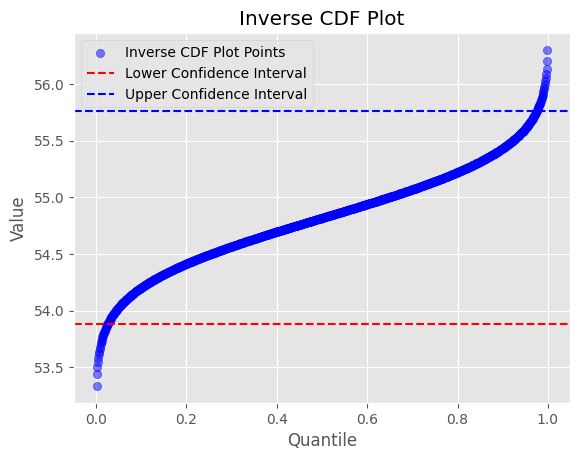

In [24]:
# Fix/Modify code by adding appropriate comments and proper formatting

# Import necessary libraries
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate x-values for the inverse cdf plot
x = np.linspace(0, 1, num=1000)

# Calculate the percentiles for the x-values using the point estimate and the standard error
# point_estimate = 0.5
# standard_error = 0.1
y = norm.ppf(x, loc=point_estimate, scale=standard_error)

# Create the plot with modified settings
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(x, y, color='blue', alpha=.5, label='Inverse CDF Plot Points')
ax.set_xlabel('Quantile')
ax.set_ylabel('Value')
ax.set_title('Inverse CDF Plot')

# Add horizontal lines for lower and upper confidence interval
# lower_se = 0.45
# upper_se = 0.55
ax.axhline(lower_se, color='red', linestyle='--', label='Lower Confidence Interval')
ax.axhline(upper_se, color='blue', linestyle='--', label='Upper Confidence Interval')

# Add legend and display plot
plt.legend()
plt.show()